## Data Science Pipeline for IRIS Data Set

### Import the Libraries

In [102]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Load Data Set

In [103]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.csv', names=names)

#shape of the data set
print ("Shape of data set: ", df.shape, "\n")

# First Few rows of the data set
print ("First 5 rows of the Iris Data:", df.head(), "\n")

# Class Distribution
print (df.groupby('class').size())

Shape of data set:  (150, 5) 

First 5 rows of the Iris Data:    sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Statistical Distribution of the data

In [104]:
print ("Statistical Distribution of Data: \n", df.describe())

Statistical Distribution of Data: 
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Creating Visualizations from the Data

## First by creating the Box and Whisker Plots

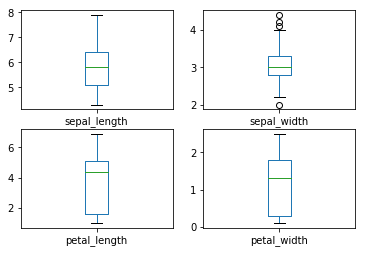

In [105]:
# Create the Box and Whisker plots

df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Plot the Histograms 

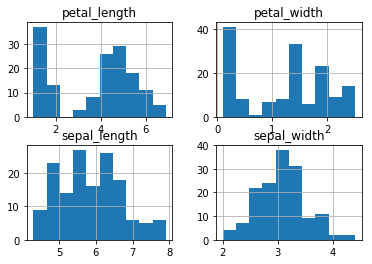

In [106]:
df.hist()
plt.show()

## Scatter Plot Matrix

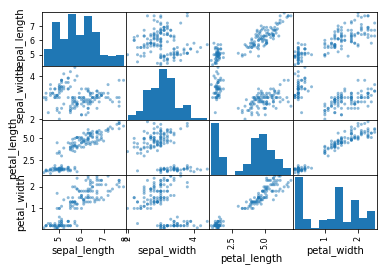

In [107]:
scatter_matrix(df)
plt.show()

## Scatter Plots with Colours

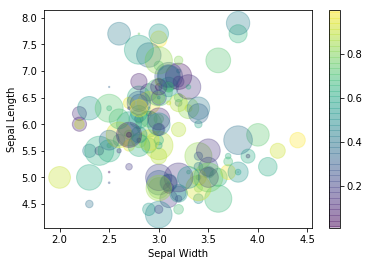

In [108]:
## Plot the scatter plots with colours
## Initially create scatter plot of Sepal Width and Sepal length
import numpy as np
colors = np.random.rand(150)
area = (30*np.random.rand(150))**2
plt.scatter(df['sepal_width'], df['sepal_length'], s=area, c=colors, alpha=0.3, cmap='viridis')
plt.colorbar();
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.show();

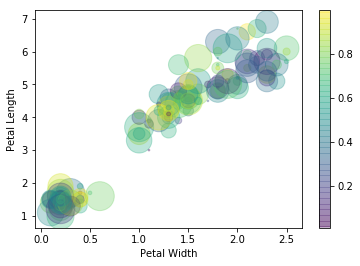

In [109]:
## Create the scatter plots of Petal length and Petal Width
plt.scatter(df['petal_width'], df['petal_length'], s=area, c=colors, alpha=0.3, cmap='viridis')
plt.colorbar();
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.show();

### Split Out Validation Data Set

In [110]:
array = df.values
X = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, 
                                                                                random_state=seed)

## Create Model Shells (Instantiate them)

In [111]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

## Spot Test Each Model with Cross Validation

In [112]:
## Test options and evaluation Metric

seed = 7
scoring = 'accuracy'

results = []
names = []

#Evaluate Each Model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
RF: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


## Graphical Comparision of Algorithms

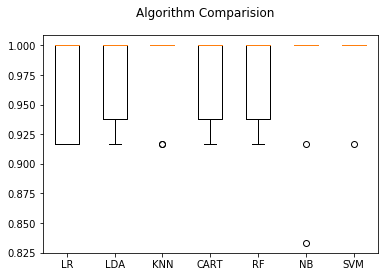

In [113]:
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Make Predictions on Validation Dataset

K Nearest Neighbors:

In [114]:
knn = KNeighborsClassifier(algorithm='brute', leaf_size=30, n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [115]:
predictions = knn.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.933333333333
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.91      0.91      0.91        11

    avg / total       0.93      0.93      0.93        30



SVM: Support Vector Machines

In [116]:
#svm = SVC()
clf = svm.SVC(cache_size=500, class_weight= 'balanced', kernel = 'linear', decision_function_shape='ovo',
              random_state=7)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=500, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
predictions = clf.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.966666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30

